# Customer Churn Prediction in Telecom Sector Using Machine Learning

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
import missingno as msno
%matplotlib inline

*Loading the Data*

In [11]:
telco_base_data = pd.read_csv('C:/Users/AGFirass/Documents/GitHub/customer-churn-prediction-telecom/data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

*Top 5 records of data*

In [12]:
telco_base_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


*Check the attributes of data like shape, columns, datatypes*

In [13]:
telco_base_data.shape

(7043, 21)

In [14]:
telco_base_data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [15]:
# checking the data types of all columns
telco_base_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [16]:
# Check the descriptive statistics of numeric variables
telco_base_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


*SeniorCitizen is a categorical variable, hence the 25%, 50% and 75% distributions are not proper*

*75% of customers have tenure less than 55 months*

*Average MonthlyCharges are USD64.76 whereas 25% customers pay more than USD89.85 per month*

Text(0.5, 1.02, 'Count of TARGET Variable per category')

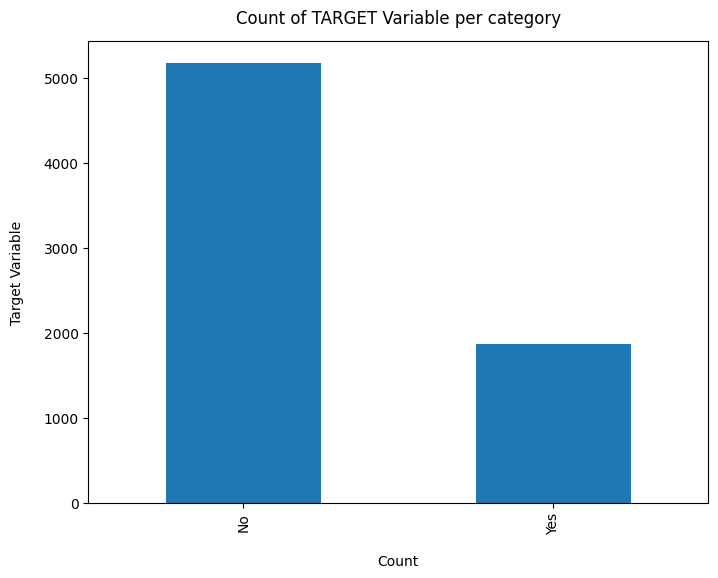

In [17]:
telco_base_data['Churn'].value_counts().plot(kind='bar', figsize=(8, 6))
plt.xlabel('Count', labelpad=14)
plt.ylabel('Target Variable', labelpad=14)
plt.title('Count of TARGET Variable per category', y=1.02)

In [18]:
telco_base_data['Churn'].value_counts() * 100 / len(telco_base_data['Churn'])

Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64

In [19]:
telco_base_data['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

*Data is highly imbalanced, ration = 73:27*

*So we analyse the data with other features while taking the target values separately to get some insights*

In [20]:
# Concise summary of the dataframe, as we have too many columns, we are using the verbose=True mode
telco_base_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


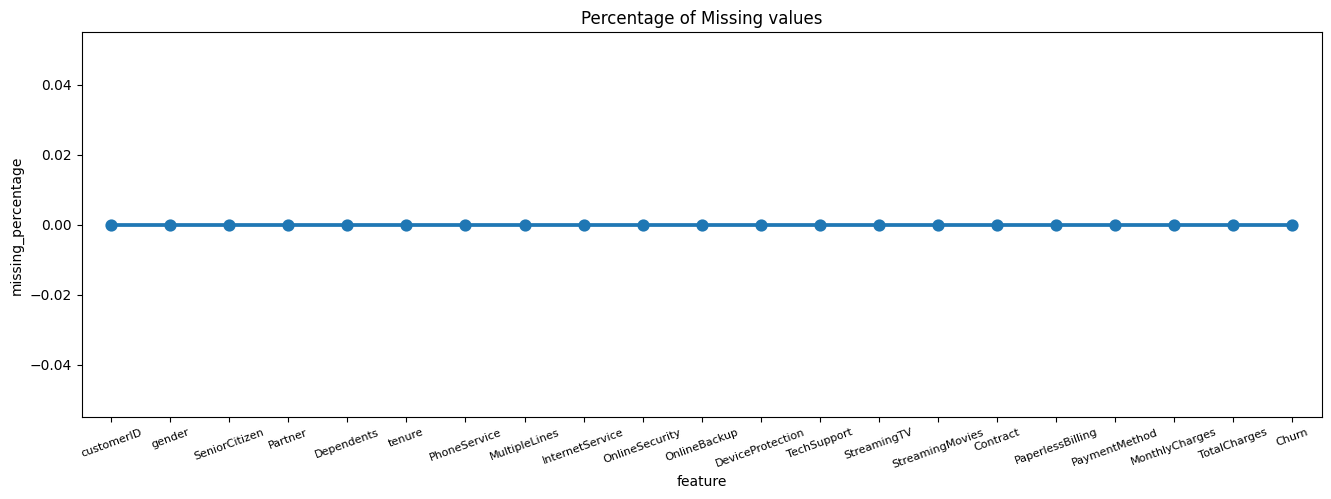

In [21]:
# This piece of code can be used for any EDA use cases
missing = pd.DataFrame((telco_base_data.isnull().sum()) * 100 / telco_base_data.shape[0]).reset_index()
missing.columns = ['feature', 'missing_percentage']

plt.figure(figsize=(16, 5))
ax = sns.pointplot(x='feature', y='missing_percentage', data=missing)
plt.xticks(rotation=20, fontsize=8)
plt.title("Percentage of Missing values")
plt.show()

### Missing Data - Initial Intuition  
- Here, we don't have any missing data.  
***General Thumb Rules***
- For features with less missing values- can use regression to predict the missing values or fill with the mean of the values present, depending on the feature.  
- For features with very high number of missing values- it is better to drop those columns as they give very less insight on analysis.  
- As there is no thumb rule on what criteria do we delete the columns with high number of missing values, but generally you can delete the columns, if you have more tha, 30-40% of missing values. But again there is a catch here, for example: is_car & car_type, People having no cars will obviously have car_type as NaN (null), but that does not make this column useless, so decisions has to be taken wisely.


<Axes: >

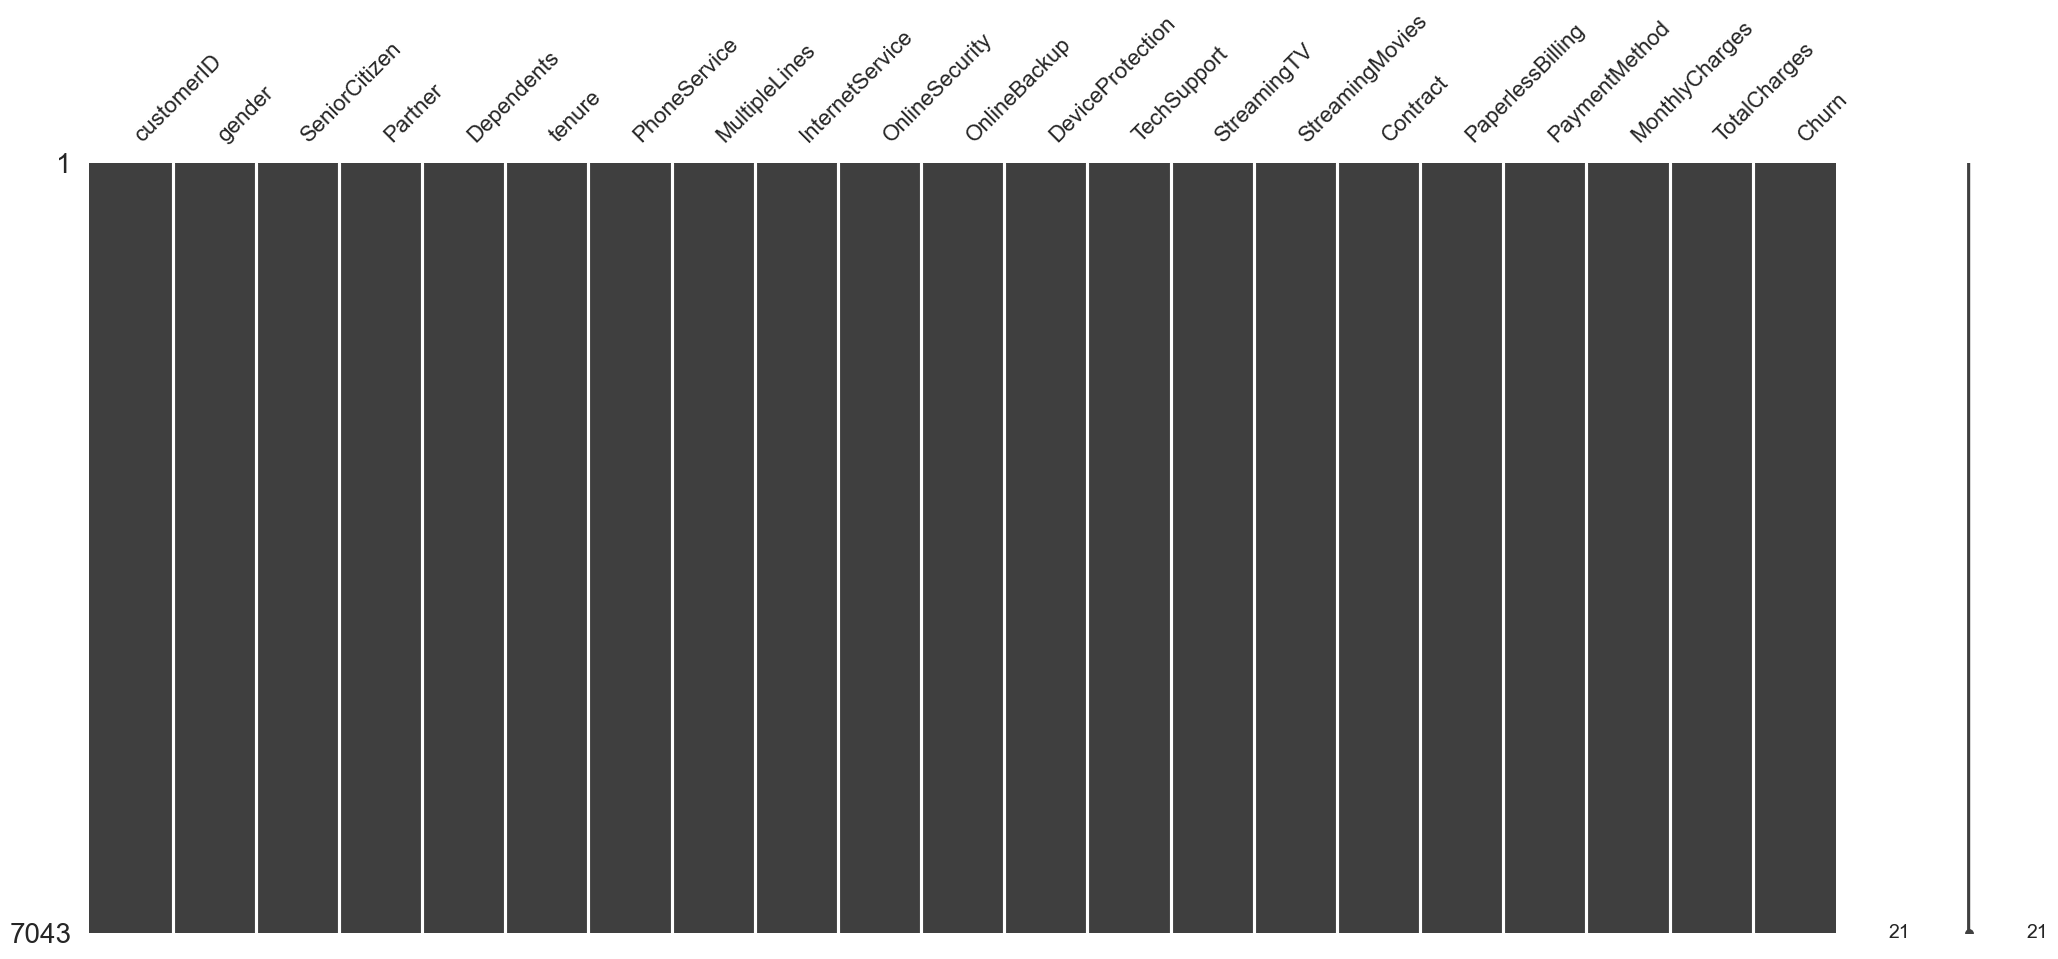

In [ ]:
# Checking missing values using missingno
msno.matrix(telco_base_data)

### Data Cleaning  

1. Create a copy of the base data for manupulation & processing

In [23]:
telco_data = telco_base_data.copy()

2. TotalCharges should be numeric amount

In [24]:
telco_data.TotalCharges = pd.to_numeric(telco_data.TotalCharges, errors='coerce')
# checking how many values are null
telco_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

3. As we can see, there are 11 missing values in TotalCharges column. Let's check these records

In [25]:
telco_data.loc[telco_data['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


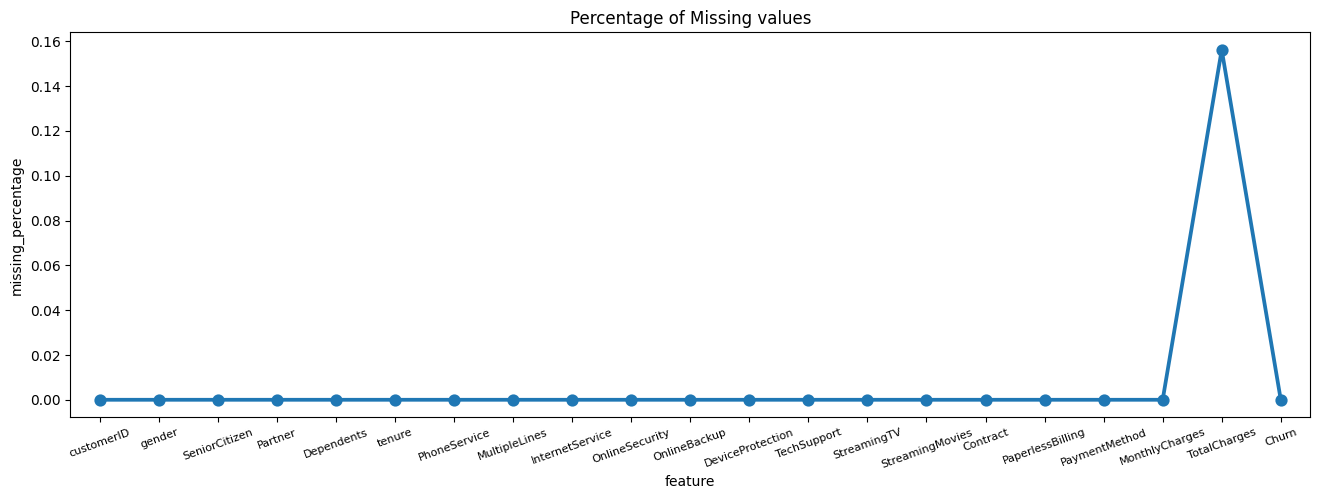

In [26]:
missing = pd.DataFrame((telco_data.isnull().sum()) * 100 / telco_data.shape[0]).reset_index()
missing.columns = ['feature', 'missing_percentage']

plt.figure(figsize=(16, 5))
ax = sns.pointplot(x='feature', y='missing_percentage', data=missing)
plt.xticks(rotation=20, fontsize=8)
plt.title("Percentage of Missing values")
plt.show()

4. **Missing Value Treatment**

Since the % of these records is very low (0.15%) compared to the total dataset, it is safe to ignore them from further processing.

In [27]:
# Removing missing values
telco_data.dropna(how='any', inplace=True)

# telco_data.fillna(0)

5. Divide customer into bins based on tenure, e.g: for tenure < 12 months: assign a tenure group 1-12, for tenure between 1 to 2 Yrs, tenure group of 13-24; and so on...

In [28]:
# Get the max tenure
max_tenure = telco_data['tenure'].max()
max_tenure

72

In [29]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, max_tenure, 12)]

telco_data['tenure_group'] = pd.cut(
    telco_data.tenure, # The column to be binned
    range(1, 80, 12), # Bin edges: 1 to 79 in steps of 12 (e.g., [1, 13), [13, 25), ...)
    right=False, # Bins are left-inclusive and right-exclusive (e.g., [1, 13) includes 1 but excludes 13)
    labels=labels # Labels for the bins, e.g., "1 - 12", "13 - 24", etc.
)

In [30]:
telco_data['tenure_group'].value_counts()

tenure_group
1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: count, dtype: int64

6. Remove columns that are not required/relevant for processing

In [31]:
# Drop columns: customerID & tenure
telco_data.drop(columns = ['customerID', 'tenure'], axis=1, inplace=True)
telco_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


### Data Exploration

1. Plot distribution of of individual predictors by churn

#### Univariate Analysis

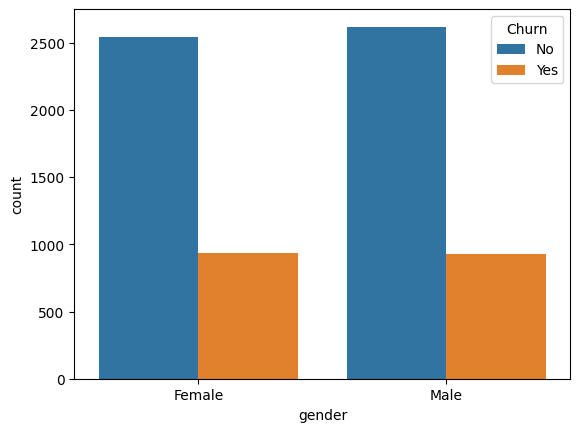

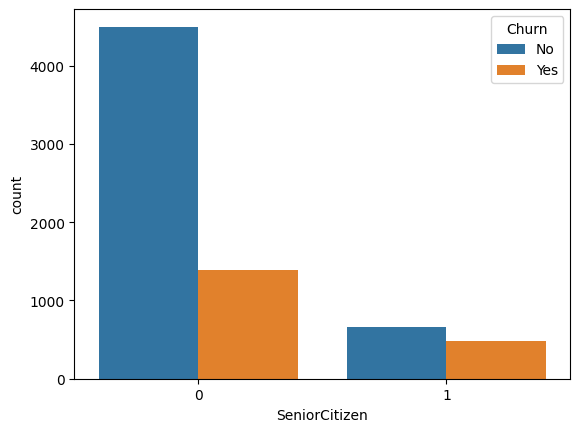

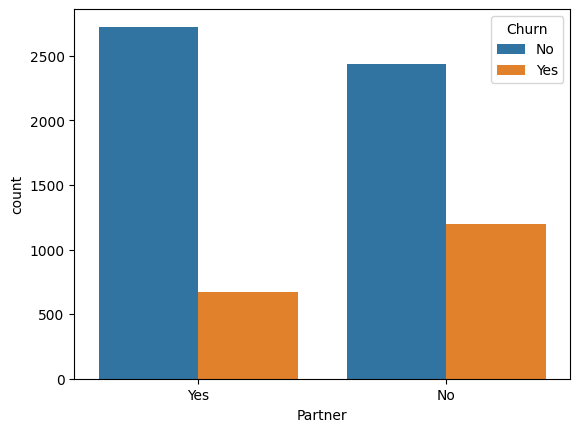

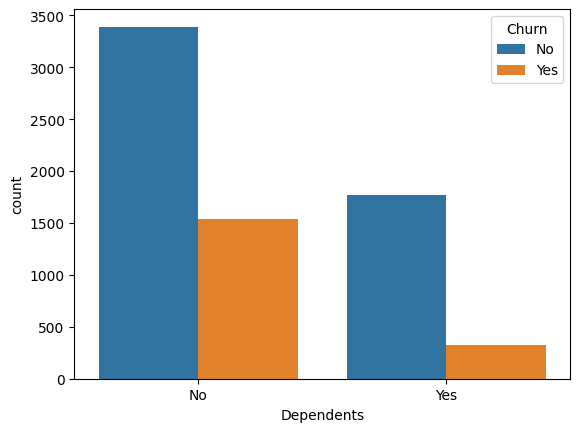

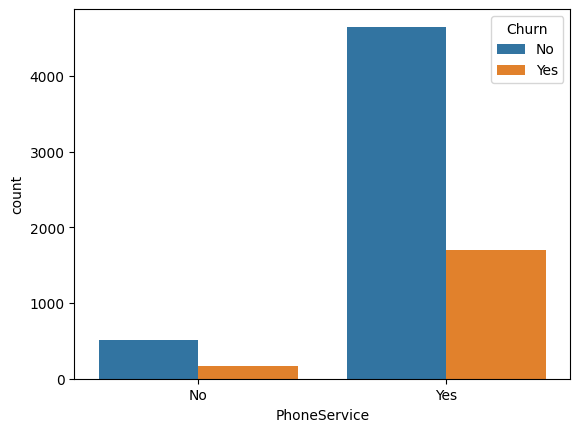

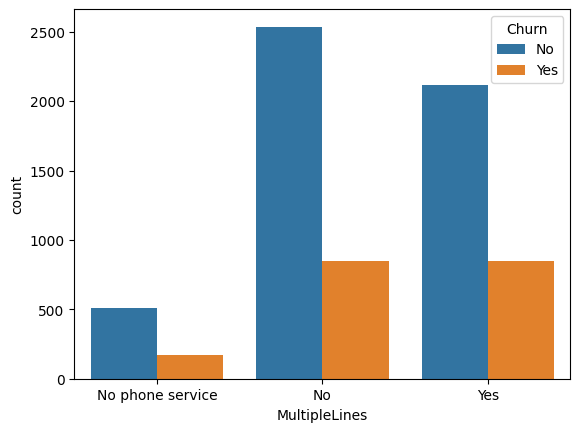

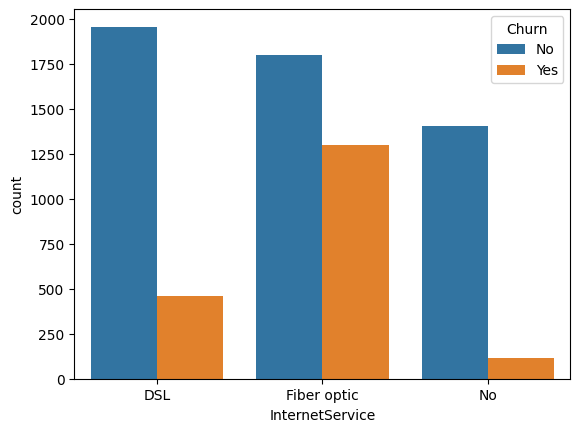

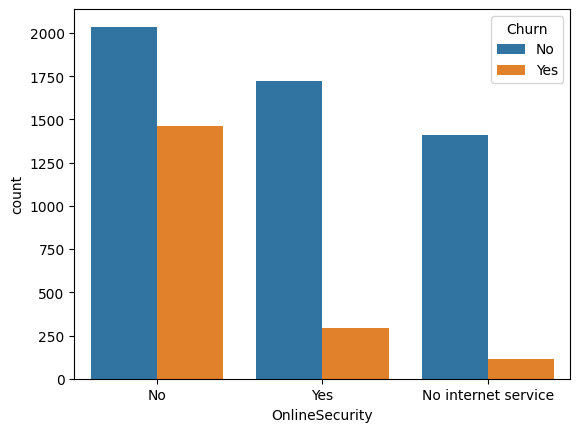

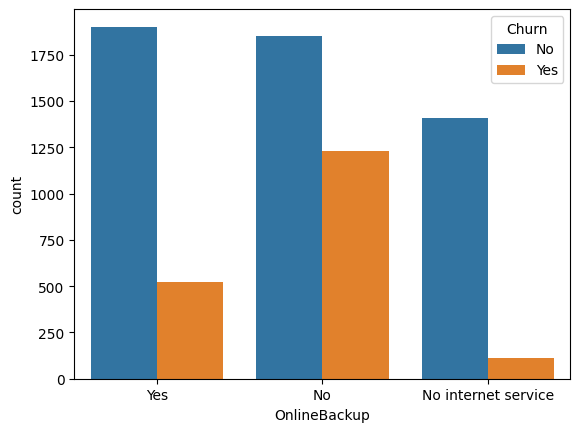

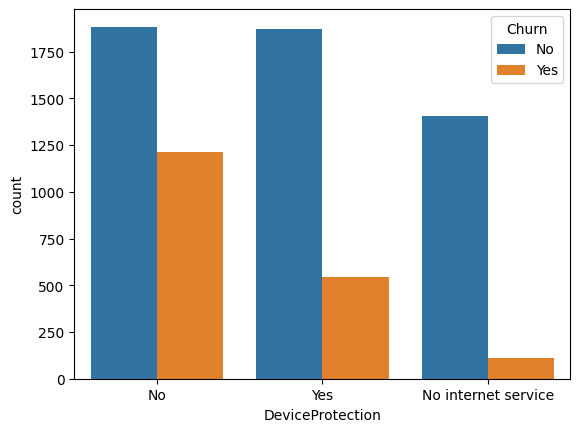

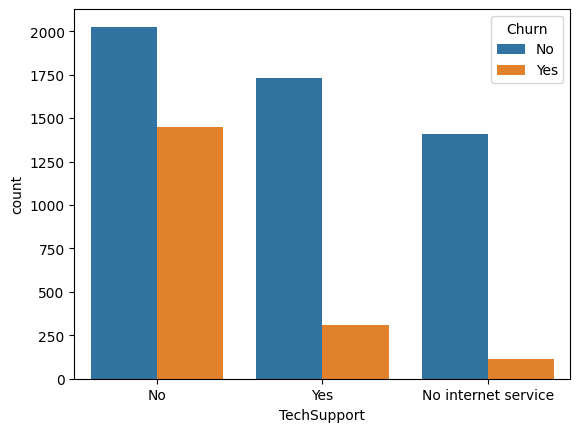

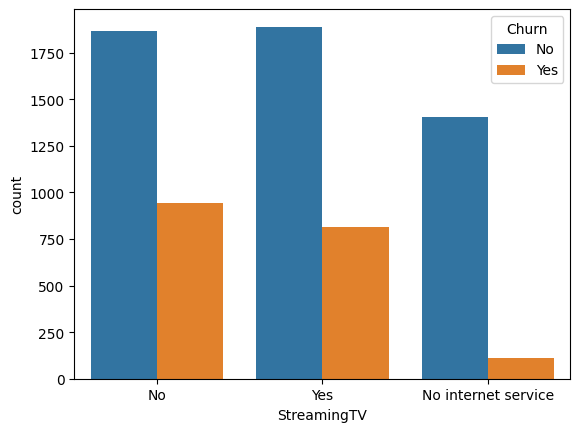

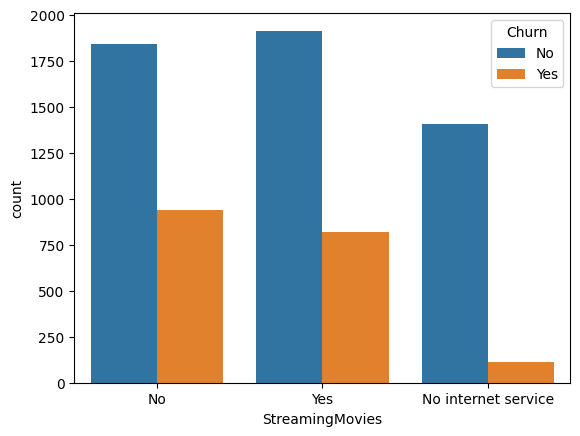

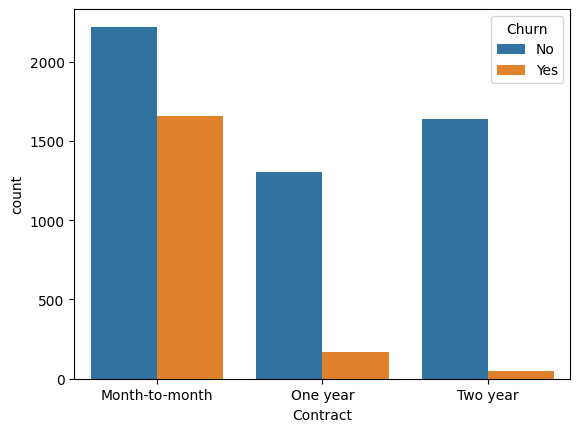

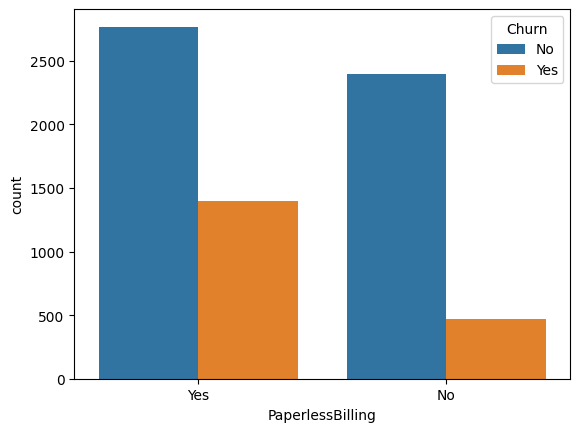

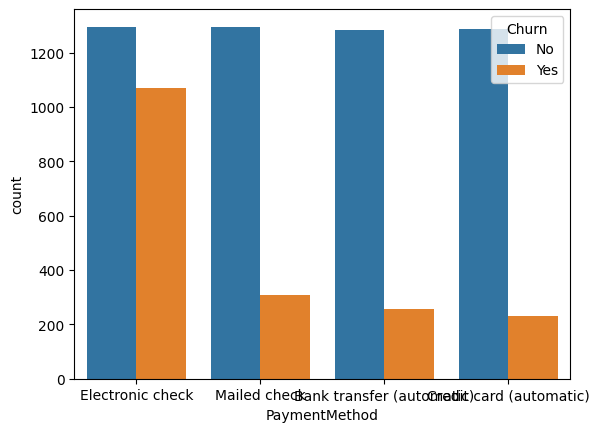

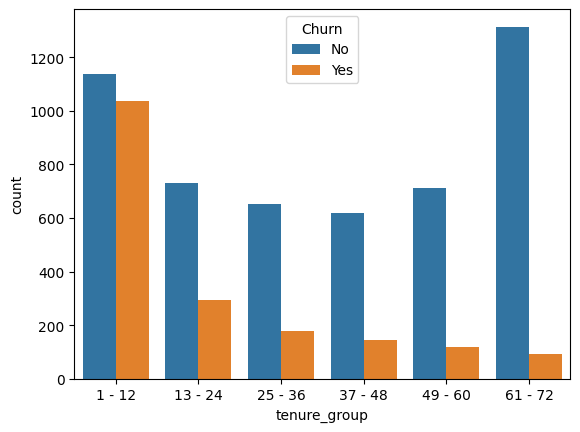

In [32]:
for i, predictor in enumerate(telco_data.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=telco_data, x=predictor, hue='Churn')

2. Convert the target variable 'Churn' in a binary numeric variable i.e. Yes=1 ; No=0

In [33]:
telco_data['Churn'] = np.where(telco_data.Churn == 'Yes', 1, 0)

In [34]:
telco_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


3. Convert all the categorical variables into dummy variables

Always apply Label-Encoding for target variables(example: *Churn*)  
Label encoding is not limited to target variables. It can be applied to features as well, but you must ensure that the encoded numeric values do not introduce misleading relationships in the data.

In [35]:
telco_data_dummies = pd.get_dummies(telco_data)
telco_data_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,True,False,False,True,True,False,...,False,False,True,False,True,False,False,False,False,False
1,0,56.95,1889.50,0,False,True,True,False,True,False,...,False,False,False,True,False,False,True,False,False,False
2,0,53.85,108.15,1,False,True,True,False,True,False,...,False,False,False,True,True,False,False,False,False,False
3,0,42.30,1840.75,0,False,True,True,False,True,False,...,True,False,False,False,False,False,False,True,False,False
4,0,70.70,151.65,1,True,False,True,False,True,False,...,False,False,True,False,True,False,False,False,False,False


4. Relationship between MonthlyCharges and TotalCharges

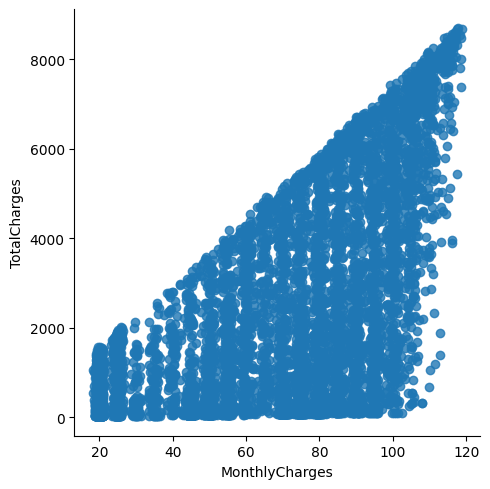

In [36]:
sns.lmplot(data=telco_data_dummies, x='MonthlyCharges', y='TotalCharges', fit_reg=False)

TotalCharges increases as MonthlyCharges increases (Highly correlated)

10. *Churn* by MonthlyCharges and TotalCharges

Text(0.5, 1.0, 'Monthly Charges by Churn')

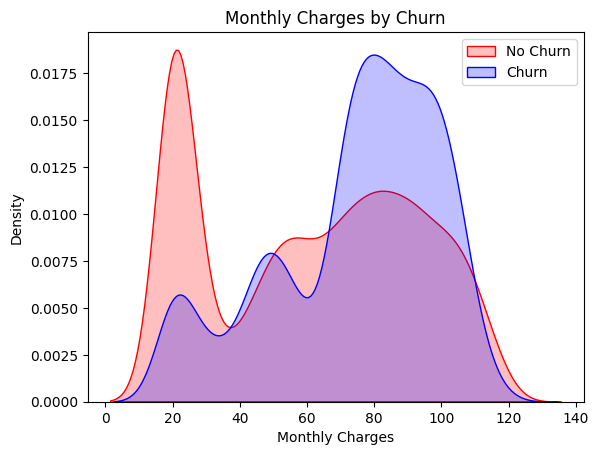

In [37]:
Mth = sns.kdeplot(
    telco_data_dummies.MonthlyCharges[(telco_data_dummies["Churn"] == 0)], color='Red', 
    fill=True
)
Mth = sns.kdeplot(
    telco_data_dummies.MonthlyCharges[(telco_data_dummies["Churn"] == 1)], 
    ax=Mth,
    color='Blue', 
    fill=True
)
Mth.legend(['No Churn', 'Churn'], loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly Charges by Churn')

**Insight:** *Churn* is high when MonthlyCharges are high

Text(0.5, 1.0, 'Total Charges by Churn')

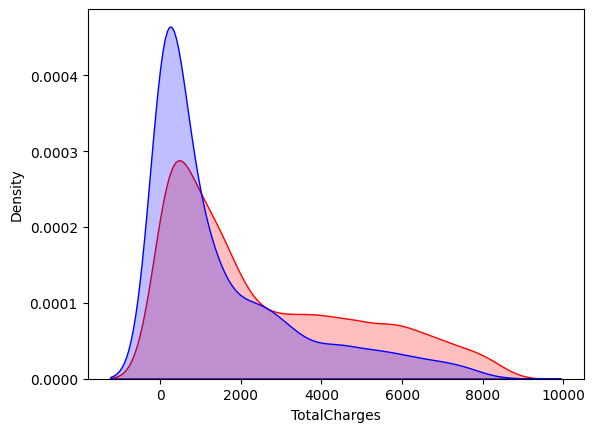

In [38]:
Tot = sns.kdeplot(
    telco_data_dummies.TotalCharges[(telco_data_dummies["Churn"] == 0)], color='Red', 
    fill=True
)
Tot = sns.kdeplot(
    telco_data_dummies.TotalCharges[(telco_data_dummies["Churn"] == 1)], 
    ax=Tot,
    color='Blue', 
    fill=True
)
Mth.legend(['No Churn', 'Churn'], loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Total Charges')
Mth.set_title('Total Charges by Churn')

**Surprising Insight:** There is higher churn at lower TotalCharges.  
However, when we combine the insights of three parameters—**Tenure**, **MonthlyCharges**, and **TotalCharges**—the picture becomes clearer:  

- Higher **MonthlyCharges** with lower **Tenure** leads to lower **TotalCharges**.  
- Therefore, these three factors—**Higher MonthlyCharges**, **Lower Tenure**, and **Lower TotalCharges**—are interconnected and linked to high churn.  


11. Build a correlation of all predictors with *Churn*

<Axes: >

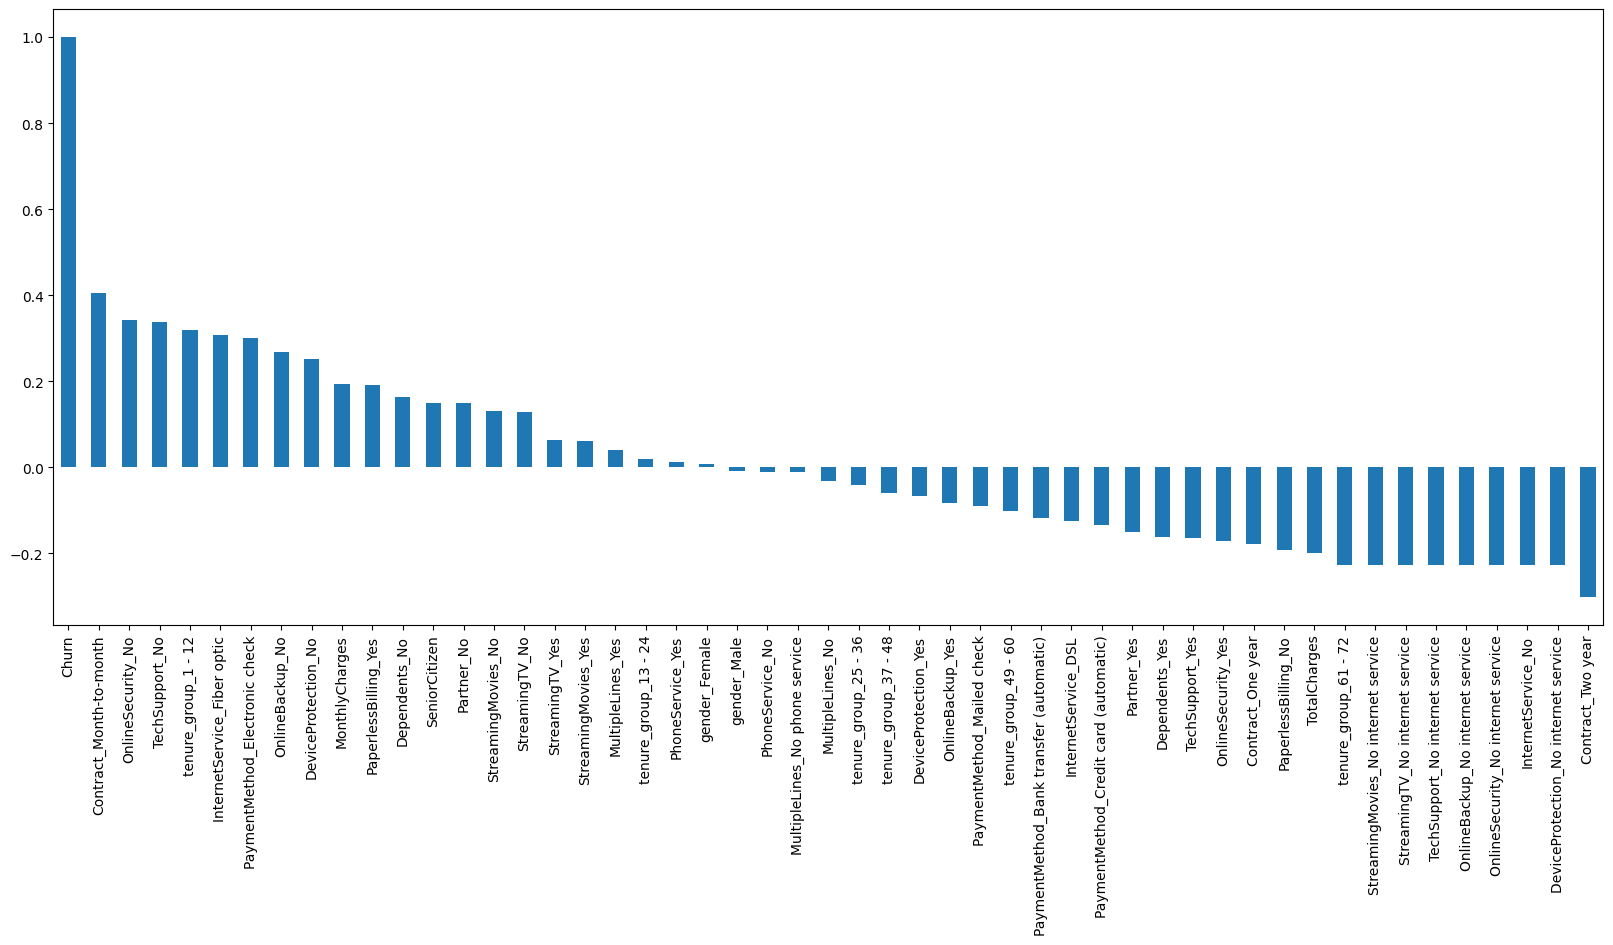

In [39]:
plt.figure(figsize=(20, 8))
telco_data_dummies.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')

**Derived Insight**  
- **High** *Churn* is observed in cases of:  
  - *Month-to-month contracts*  
  - *No online security*  
  - *No tech support*  
  - *First year of subscription*  
  - *Fiber optic internet*  

- **Low** *Churn* is observed in cases of:  
  - *Long-term contracts*  
  - *Subscriptions without internet service*  
  - *Customers engaged for 5+ years*  

Factors such as *Gender*, *Availability of Phone Service*, and *Multiple Lines* have almost **NO** impact on ***Churn***.  
This is also evident from the **Heatmap** below.  


<Axes: >

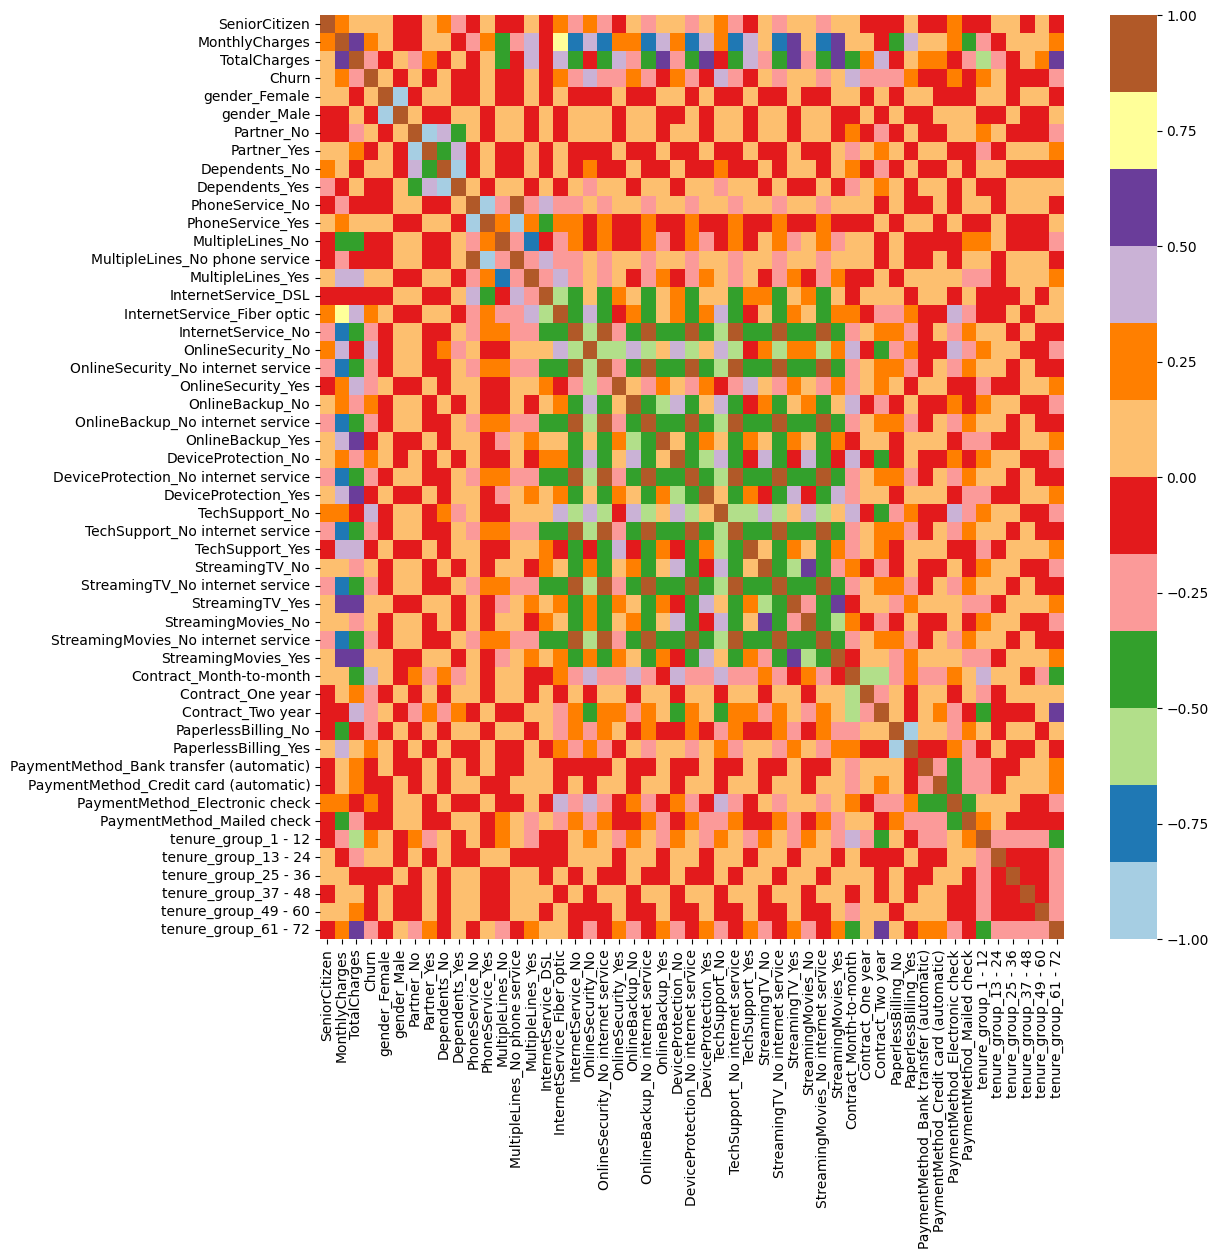

In [40]:
plt.figure(figsize=(12, 12))
sns.heatmap(telco_data_dummies.corr(), cmap='Paired')

#### Bivariate Analysis

In [41]:
new_df1_target0 = telco_data.loc[telco_data['Churn'] == 0]
new_df1_target1 = telco_data.loc[telco_data['Churn'] == 1]

In [42]:
def uniplot(df, col, title, hue=None):
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams["axes.titlesize"] = 22
    plt.rcParams["axes.titlepad"] = 30
    
    temp = pd.Series(data=hue)
    width = len(df[col].unique()) + 7 + 4 * len(temp.unique())
    
    # Create the figure and adjust the size dynamically
    plt.figure(figsize=(width, 8))
    plt.xticks(rotation=45)
    plt.title(title)
    
    # Count plot without log scale
    ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index, hue=hue, palette='bright')
    
    # Get the count of each category and apply log scale manually
    ax.set_yscale('log')
    
    plt.show()


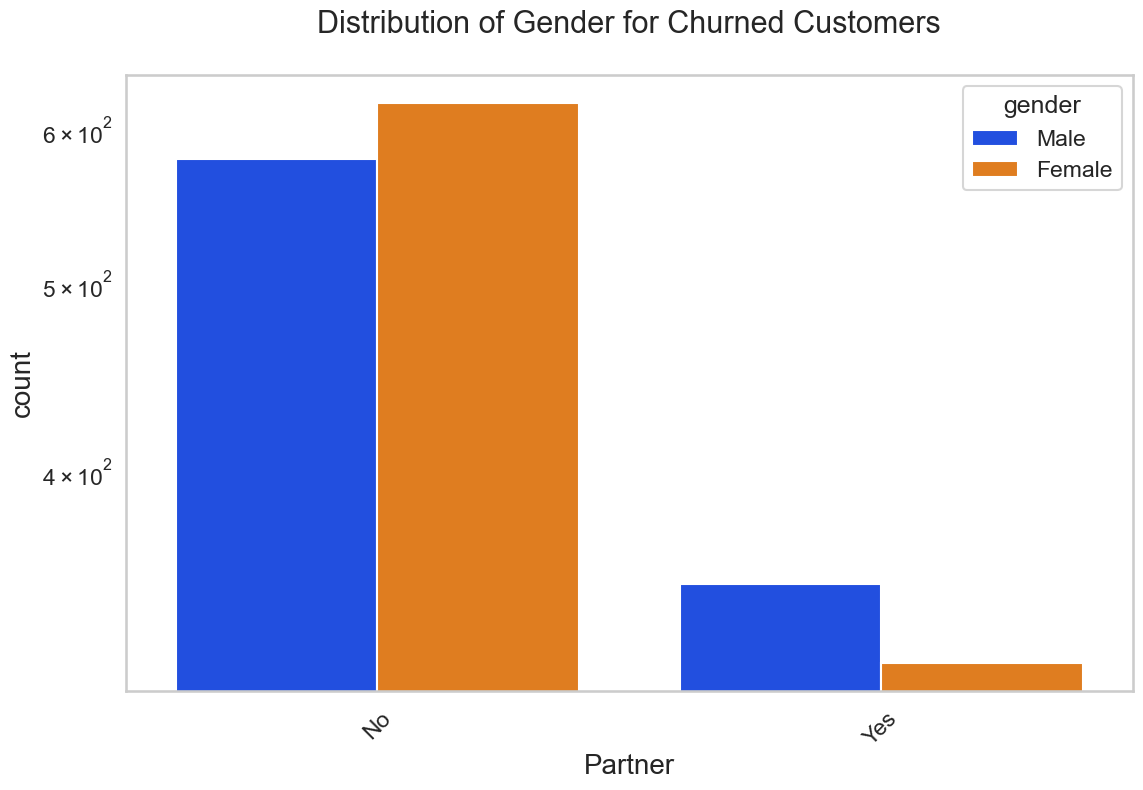

In [43]:
uniplot(new_df1_target1, col = 'Partner', title = 'Distribution of Gender for Churned Customers', hue = 'gender')

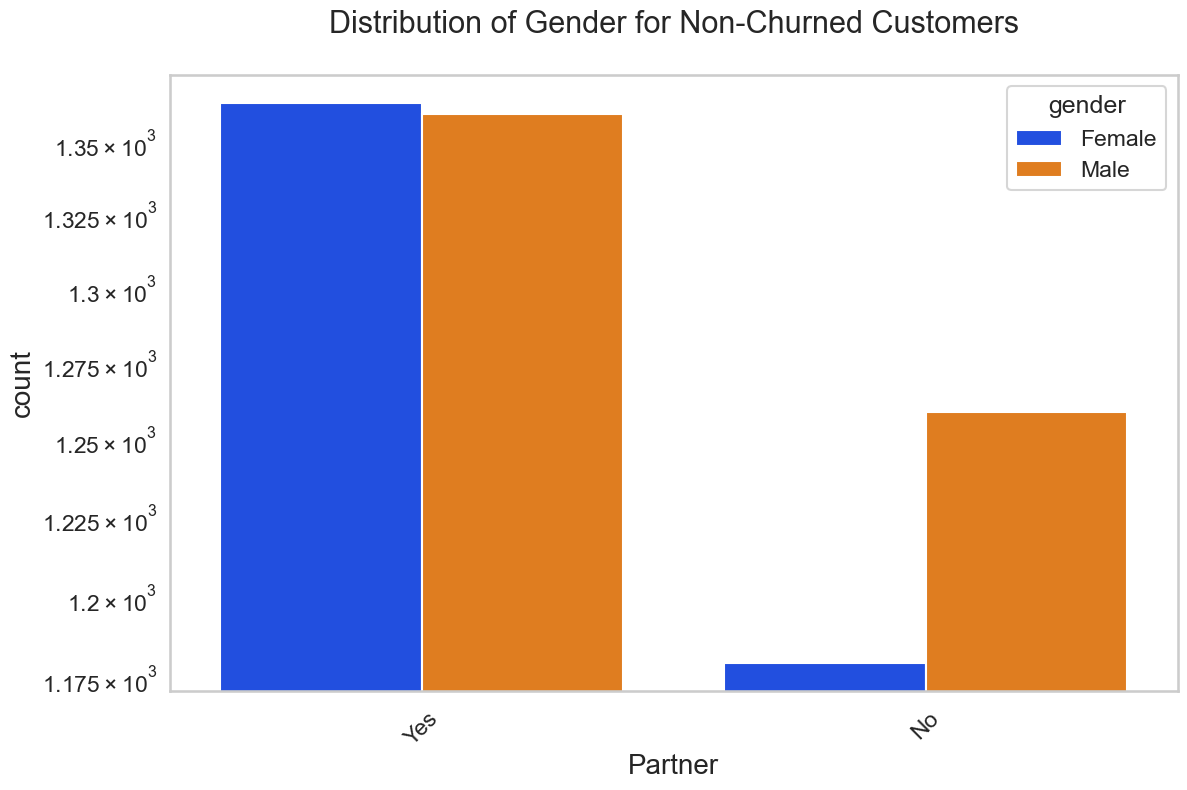

In [44]:
uniplot(new_df1_target0, col = 'Partner', title = 'Distribution of Gender for Non-Churned Customers', hue = 'gender')

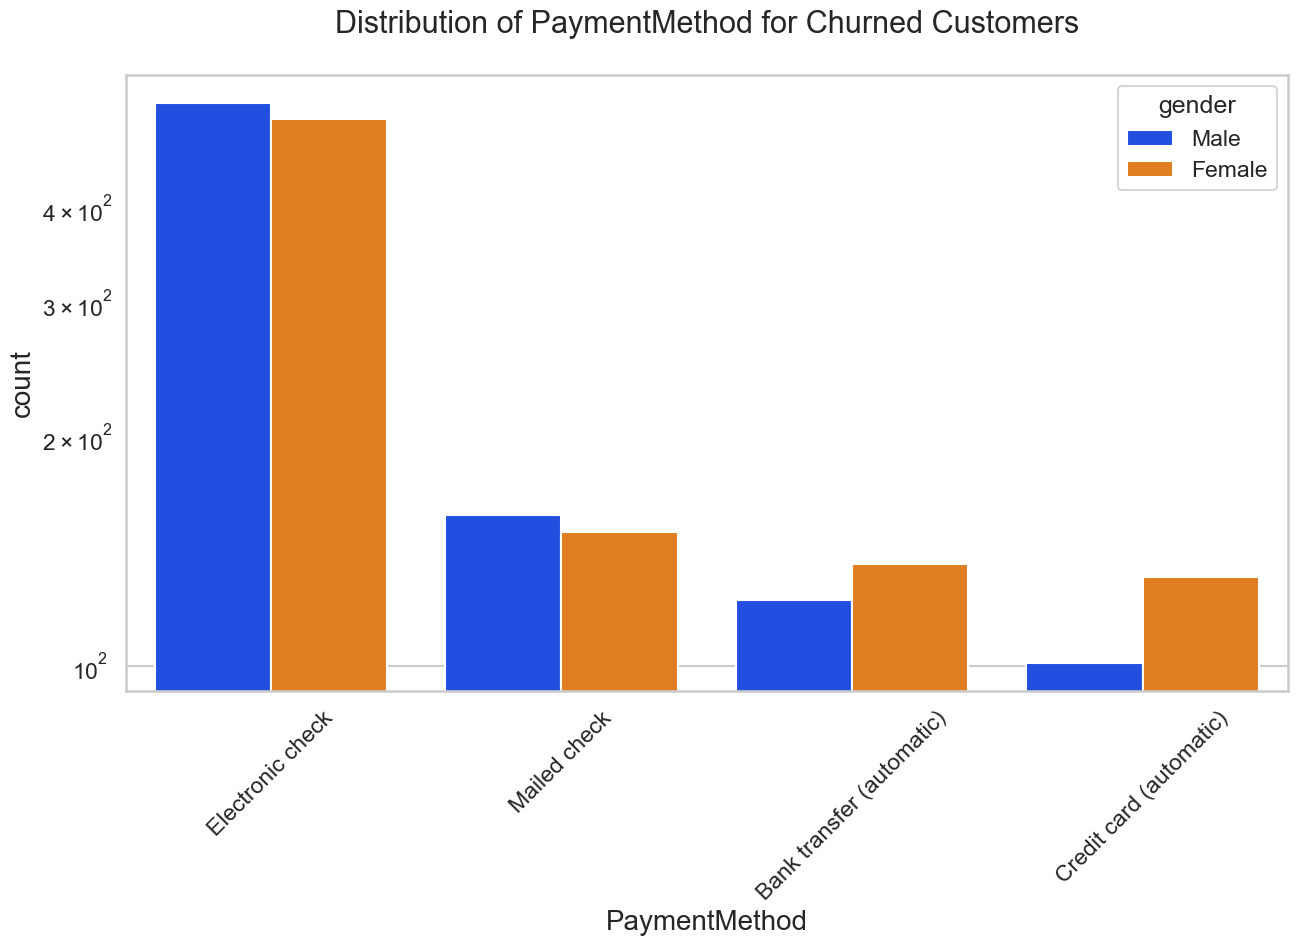

In [45]:
uniplot(new_df1_target1, col = 'PaymentMethod', title = 'Distribution of PaymentMethod for Churned Customers', hue = 'gender')

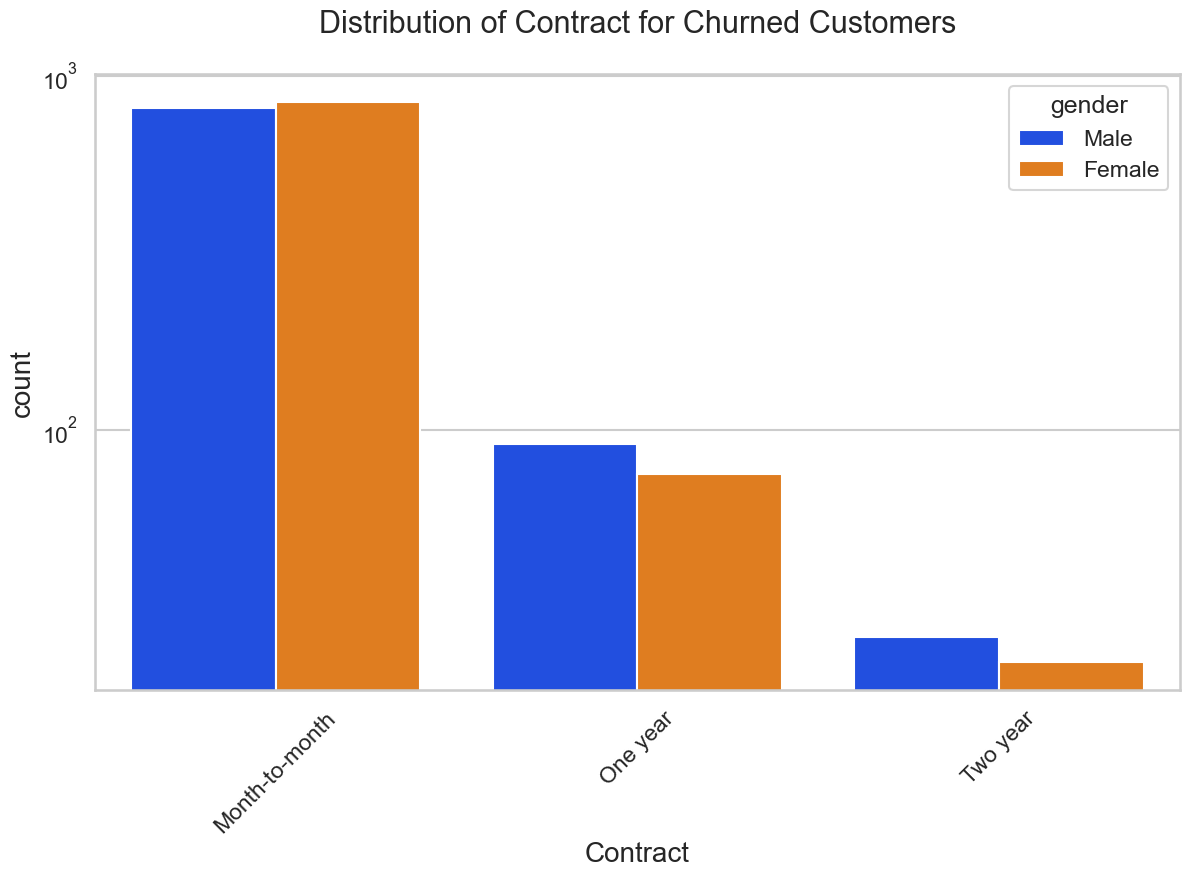

In [46]:
uniplot(new_df1_target1, col = 'Contract', title = 'Distribution of Contract for Churned Customers', hue = 'gender')

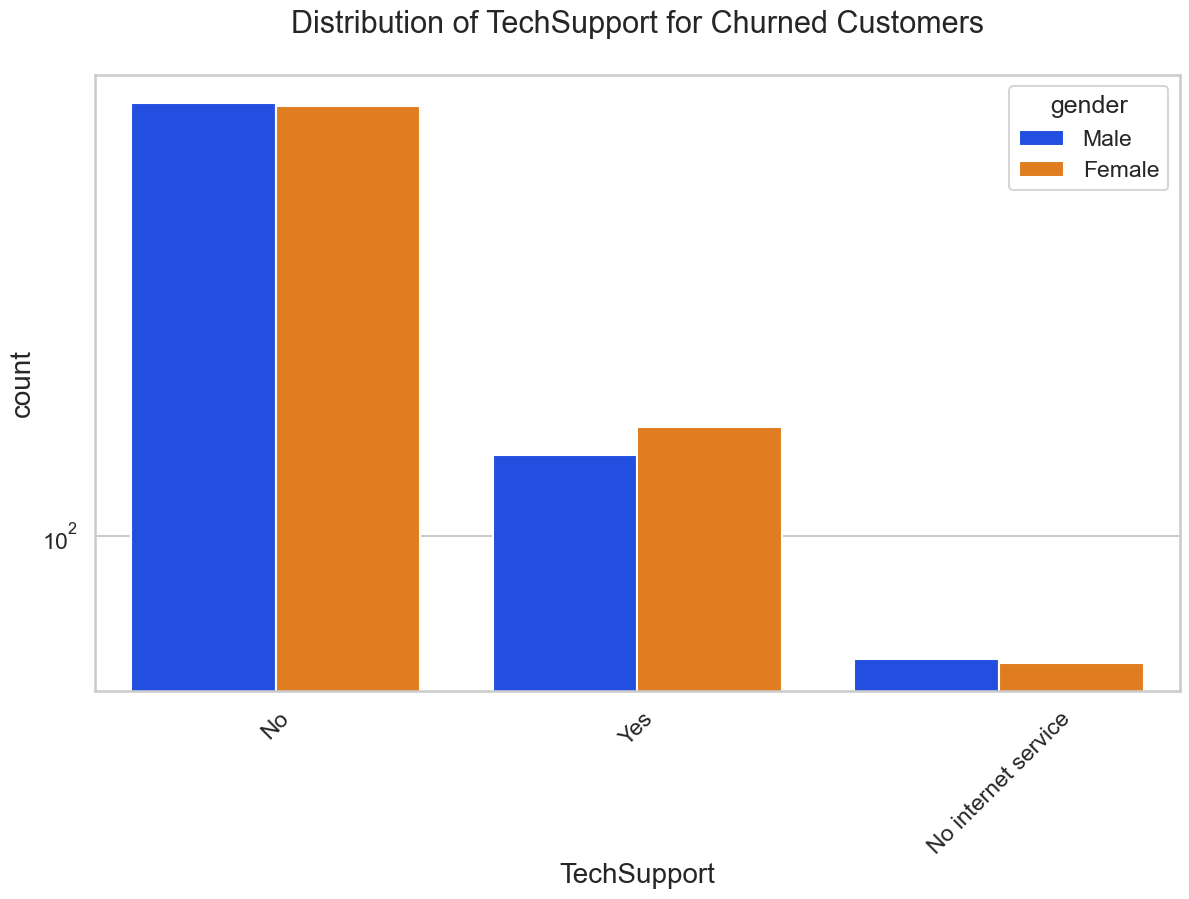

In [47]:
uniplot(new_df1_target1, col = 'TechSupport', title = 'Distribution of TechSupport for Churned Customers', hue = 'gender')

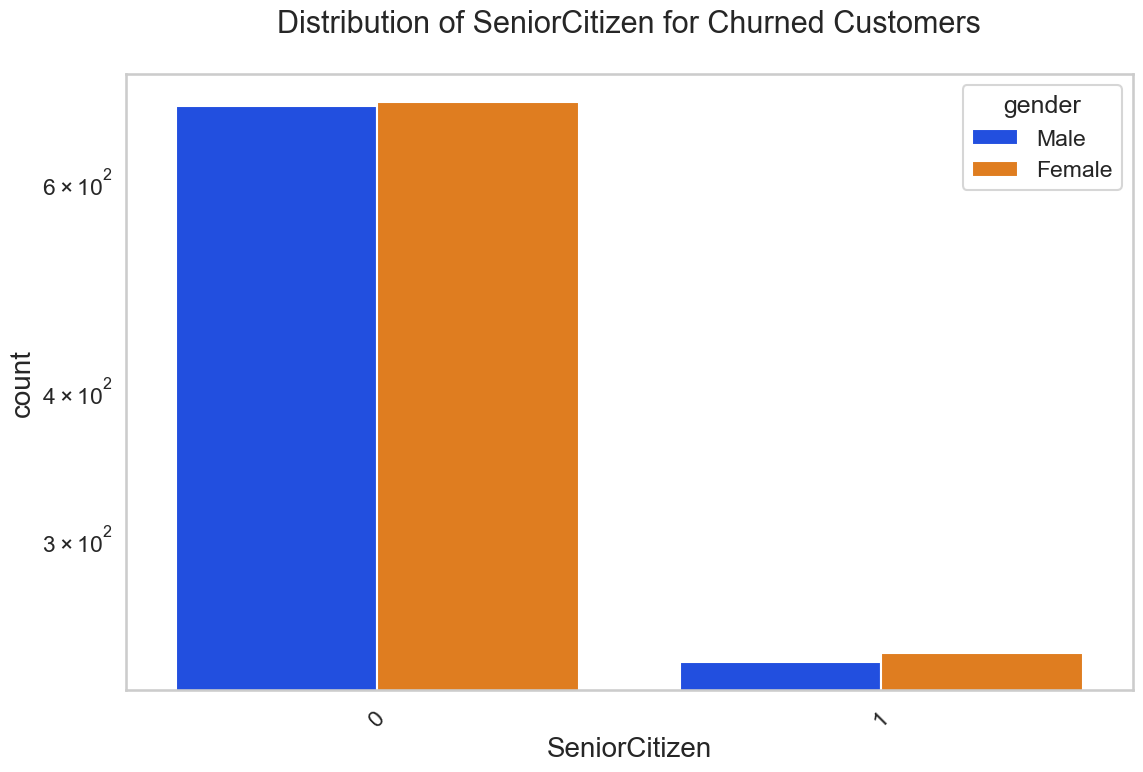

In [48]:
uniplot(new_df1_target1, col = 'SeniorCitizen', title = 'Distribution of SeniorCitizen for Churned Customers', hue = 'gender')

In [49]:
telco_data_dummies.to_csv('C:/Users/AGFirass/Documents/GitHub/customer-churn-prediction-telecom/data/tel2_churn.csv')

## Conclusion  
These are some of the quick insights from this exercice:  
1. Electric check medium are the highest churners.  
2. Contract Type - Monthly customers are more likely to churn because of no contract terms, as they are free to go customers.  
3. No Online security, No Tech Support category are high churners.  
4. No senior Citizens are high churners.  

*Note:* There could be many more such insights.
